<a href="https://colab.research.google.com/github/Nourankh20/Data-Visualization/blob/mohamed/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/Nourankh20/Data-Visualization/main/datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../datasets/{dataset_name}'


In [2]:
athlete_events_df =  pd.read_csv(get_path('athlete_events.csv'))

In [3]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc_regions = pd.read_csv(get_path('noc_regions.csv'))

In [5]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Merging the 2 datasets into one dataset called df

In [6]:
df = pd.merge(athlete_events_df,noc_regions,left_on='NOC',right_on='NOC')

In [7]:
df.head()

df = df.drop_duplicates()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [8]:
null_values_percentages = df.isna().sum()/len(df) *100
null_values_percentages

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453460
Height    21.800269
Weight    22.806646
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.239177
region     0.007796
notes     98.130907
dtype: float64

# Dealing with outliers in Height


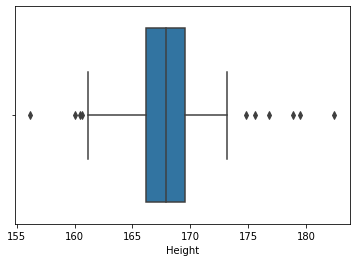

In [10]:
import seaborn as sns

Females= df[df['Sex']=='F']
Males=df[df['Sex']=='M']


sports_height_females = Females.groupby(Females['Sport'])['Height'].mean()
sports_height_males = Males.groupby(Males['Sport'])['Height'].mean()


dropped_null_values_height_females = sports_height_females.dropna(how='all')
dropped_null_values_height_females.values

dropped_null_values_height_males = sports_height_males.dropna(how='all')
dropped_null_values_height_males
#print(dropped_null_values_weight_males)

ay = sns.boxplot(x=dropped_null_values_height_females)


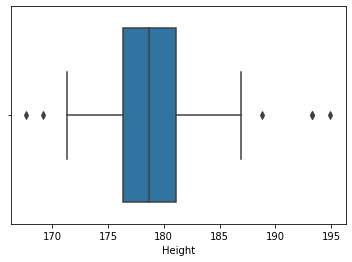

In [11]:
ay = sns.boxplot(x=dropped_null_values_height_males)


In [12]:
#Removed outliers in female height

Q1 = np.percentile(dropped_null_values_height_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1


Females = Females[~(Females['Height'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Height'] <= (Q1-1.5*IQR))]




#Removed outliers in male height

Q1 = np.percentile(dropped_null_values_height_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Height'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Height'] <= (Q1-1.5*IQR))]




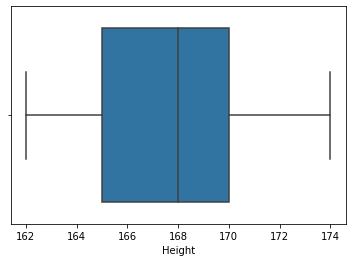

In [13]:
ax = sns.boxplot(x=Females['Height'])


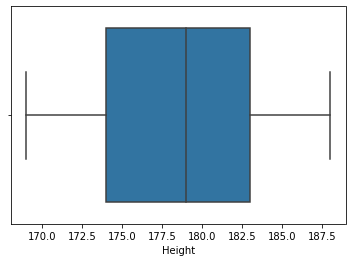

In [14]:
ax = sns.boxplot(x=Males['Height'])


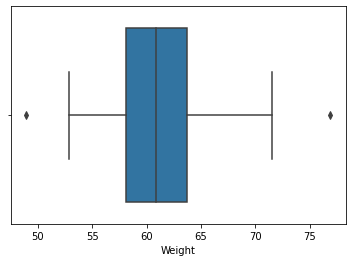

In [15]:

sports_weight_females = Females.groupby(Females['Sport'])['Weight'].mean()
sports_weight_males = Males.groupby(Males['Sport'])['Weight'].mean()


dropped_null_values_weight_females = sports_weight_females.dropna(how='all')
dropped_null_values_weight_females.values

dropped_null_values_weight_males = sports_weight_males.dropna(how='all')
dropped_null_values_weight_males


ay = sns.boxplot(x=dropped_null_values_weight_females)




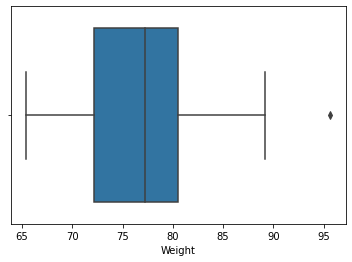

In [16]:
ay = sns.boxplot(x=dropped_null_values_weight_males)



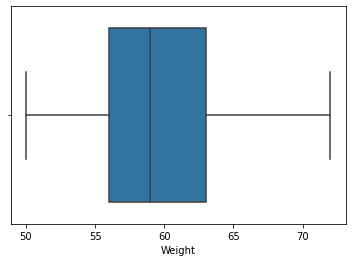

In [17]:

#Removed outliers in female weight

Q1 = np.percentile(dropped_null_values_weight_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Females = Females[~(Females['Weight'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Weight'] <= (Q1-1.5*IQR))]


#Removed outliers in male weight

Q1 = np.percentile(dropped_null_values_weight_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Weight'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Weight'] <= (Q1-1.5*IQR))]

ay = sns.boxplot(x=Females['Weight'])



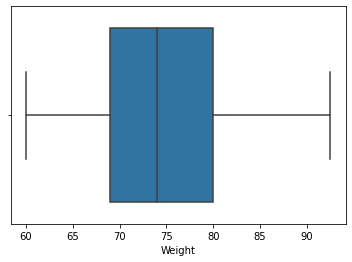

In [18]:
ay = sns.boxplot(x=Males['Weight'])


In [19]:
Males.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN


In [20]:
Males['Weight']

0         80.0
1         60.0
2         75.0
6         72.0
7         72.0
          ... 
270753    65.0
270754    65.0
270758     NaN
270765    63.0
270766    75.0
Name: Weight, Length: 147015, dtype: float64

In [21]:
#Male height nan
height = Males[(Males['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]
    if dropped_null_values_height_males.index.str.contains(sport).any() :
      Males.loc[index,['Height']] = dropped_null_values_height_males[sport]  

In [22]:
Males.isna().sum()/len(Males)  *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        5.823896
Height     0.062579
Weight    35.980682
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.892596
region     0.006802
notes     97.813829
dtype: float64

In [23]:
dropped_null_values_weight_males

Sport
Alpine Skiing                79.142537
Archery                      77.210767
Art Competitions             77.933333
Athletics                    72.086167
Badminton                    73.959437
Baseball                     84.131350
Basketball                   78.560583
Beach Volleyball             83.509804
Biathlon                     72.619969
Bobsleigh                    89.218625
Boxing                       68.805464
Canoeing                     78.885836
Cross Country Skiing         72.013646
Curling                      81.121827
Cycling                      72.572144
Diving                       69.941541
Equestrianism                71.131241
Fencing                      74.639399
Figure Skating               70.916139
Football                     73.235920
Freestyle Skiing             74.852381
Golf                         79.116279
Gymnastics                   66.786002
Handball                     82.996945
Hockey                       74.009376
Ice Hockey         

In [24]:
#Male weight
Males = Males[Males.Sport != 'Polo']
weight = Males[(Males['Weight'].isna())]
print(Males['Weight'].isna().sum())
for index, row in weight.iterrows():
    sport = row[12]
    if dropped_null_values_weight_males.index.str.contains(sport).any() :
      print( dropped_null_values_weight_males[sport])
      Males.loc[index,['Weight']] = dropped_null_values_weight_males[sport]



52802
72.08616699305679
70.91613924050633
75.29921942758023
72.08616699305679
72.08616699305679
72.08616699305679
72.08616699305679
77.93333333333334
72.08616699305679
72.08616699305679
72.08616699305679
72.08616699305679
77.93333333333334
78.56058282208589
72.08616699305679
72.08616699305679
68.80546448087432
78.56058282208589
78.56058282208589
72.08616699305679
76.44634146341464
76.44634146341464
76.44634146341464
72.08616699305679
79.0185389133627
72.6199687377882
73.23592010478062
72.08616699305679
72.08616699305679
73.23592010478062
78.56058282208589
72.08616699305679
72.08616699305679
72.08616699305679
72.08616699305679
70.91613924050633
78.56058282208589
78.56058282208589
78.56058282208589
73.23592010478062
79.14253664373318
79.14253664373318
76.44634146341464
76.44634146341464
78.56058282208589
70.91613924050633
76.44634146341464
76.44634146341464
72.6199687377882
72.6199687377882
72.01364572605561
72.01364572605561
72.01364572605561
72.08616699305679
72.08616699305679
78.56058

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Streaming output truncated to the last 5000 lines.
75.29921942758023
82.16848673946959
75.29921942758023
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
72.57214375111747
72.57214375111747
66.78600169419738
66.78600169419738
74.63939920556108
74.63939920556108
73.23592010478062
73.23592010478062
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
68.80546448087432
73.23592010478062
77.93333333333334
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
77.93333333333334
78.8858356940

In [25]:
Males.isna().sum()/len(Males) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        5.824258
Height     0.062619
Weight     0.078274
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.929077
region     0.006806
notes     97.812415
dtype: float64

In [26]:
#Female height
height = Females[(Females['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]
    if dropped_null_values_height_females.index.str.contains(sport).any() :
      Females.loc[index,['Height']] = dropped_null_values_height_females[sport]

Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.916277
Height     0.018990
Weight    17.314311
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.769222
region     0.004748
notes     98.675434
dtype: float64

In [27]:
#Female weight
weight = Females[(Females['Weight'].isna())]
for index, row in weight.iterrows():
    sport = row[12]
    if dropped_null_values_weight_females.index.str.contains(sport).any() :
      Females.loc[index,['Weight']] = dropped_null_values_weight_females[sport]

Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.916277
Height     0.018990
Weight     0.569706
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.769222
region     0.004748
notes     98.675434
dtype: float64

In [28]:
frames = [Females, Males]
Olympics_data_cleaned = pd.concat(frames)
Olympics_data_cleaned.isna().sum()/len(Olympics_data_cleaned) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.730570
Height     0.052897
Weight     0.187784
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.893455
region     0.006348
notes     98.004729
dtype: float64

In [68]:


Region= df[df['region']!='NaN']
 Region_sport= Region.groupby(Region['Sport'])



Region_sport.head()

#Sport = df[Games]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204616,19192,William Marshall Cazalet,M,42.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN,UK,NaN
204845,22095,Winchester St. George Clowes,M,31.0,NaN,NaN,Wolseley-Siddeley-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed A-Class (Open),NaN,UK,NaN
206198,34641,Alfred George Fentiman,M,40.0,NaN,NaN,Dylan-2,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed A-Class (Open),NaN,UK,NaN
206239,35191,John Charles Field-Richards,M,29.0,NaN,NaN,Gyrinus-1,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),Gold,UK,NaN
